<a href="https://colab.research.google.com/github/gauravpks/dl-repo/blob/master/CNN/CNNImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

A couple utility functions to plot grayscale and RGB images:

In [ ]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

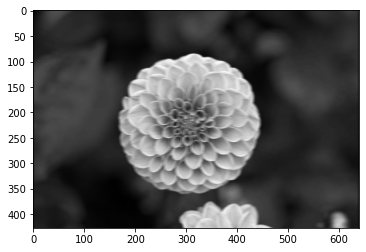

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters- one with vertical white line in middle and other with horizantal white line in middle
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME") #TF low level API

plt.imshow(outputs[1, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
#plt.axis("off") 
plt.show()

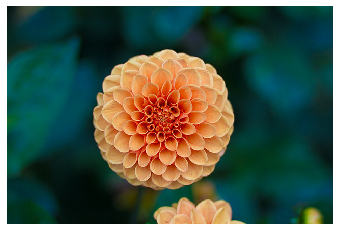

In [ ]:
plot_color_image(flower)

In [ ]:
filters[:,:,0,0]

array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

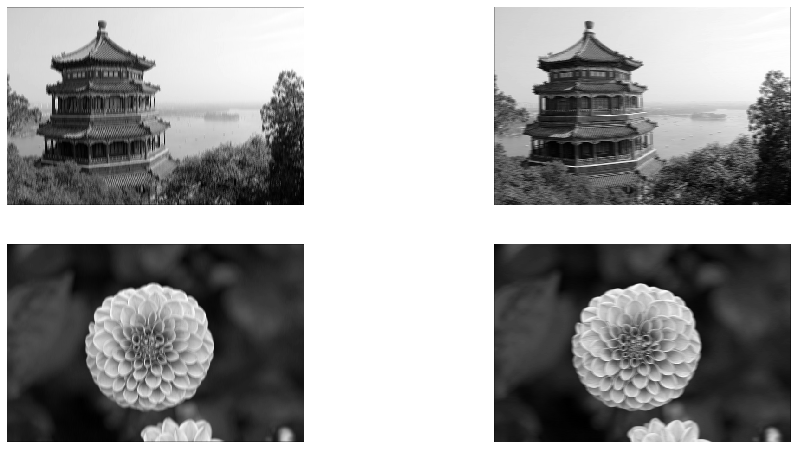

In [ ]:
plt.figure(figsize=(16,8))
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

In [ ]:
def crop(images):
    return images[150:220, 130:250]

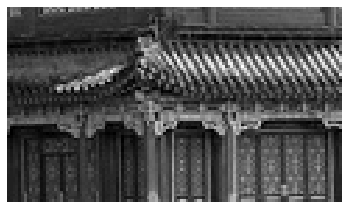

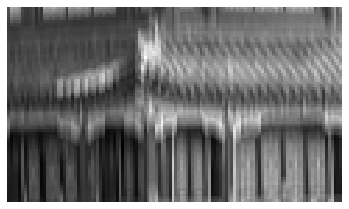

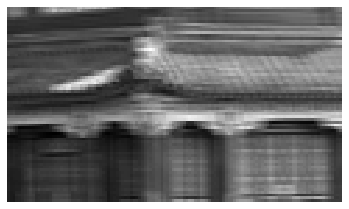

In [ ]:
plot_image(crop(images[0, :, :, 0]))
plt.show()

for feature_map_index in (0, 1):
    plot_image(crop(outputs[0, :, :, feature_map_index])) #"china_vertical", "china_horizontal"
    plt.show()

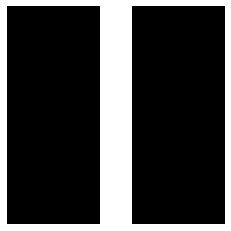

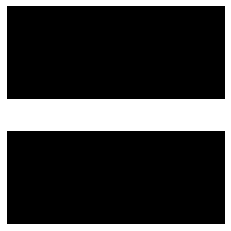

In [ ]:
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()

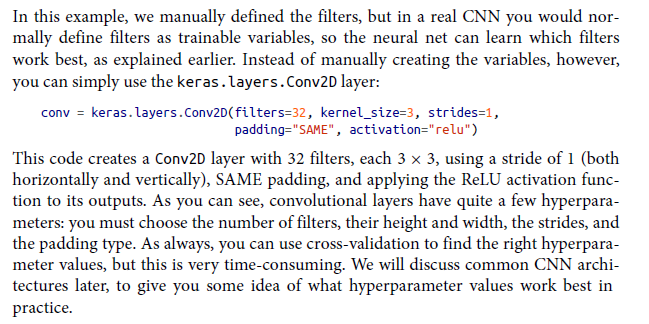

In [ ]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="SAME", activation="relu")

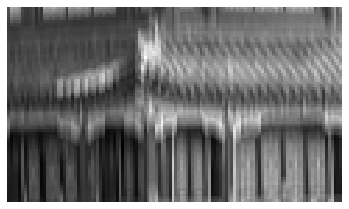

In [ ]:
plot_image(crop(outputs[0, :, :, 0]))
plt.show()

#MNIST Dataset

In [9]:
import tensorflow as tf
import numpy as np

from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

In [21]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]


In [22]:
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

In [23]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [24]:
X_train.shape

(55000, 28, 28, 1)

In [25]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 64)        3200      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 256)        

In [27]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])


In [28]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 1.0081 - accuracy: 0.6388 - val_loss: 0.4374 - val_accuracy: 0.8520
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.4360 - accuracy: 0.8524 - val_loss: 0.3067 - val_accuracy: 0.8864
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3742 - accuracy: 0.8743 - val_loss: 0.3231 - val_accuracy: 0.8888
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3193 - accuracy: 0.8920 - val_loss: 0.2951 - val_accuracy: 0.8956
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2983 - accuracy: 0.8986 - val_loss: 0.2983 - val_accuracy: 0.8928
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2825 - accuracy: 0.9051 - val_loss: 0.2961 - val_accuracy: 0.9016
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2706 - accuracy: 0.9092 - val_loss: 0.2813 - val_ac

In [33]:
score

[0.30545008182525635, 0.9035999774932861]

**General Way**

In [20]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, activation='relu', padding="SAME", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(256, 3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(256, 3, activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

#MNIST Optimal Solution - Kaggle Result

The following model uses 2 convolutional layers, followed by 1 pooling layer, then dropout 25%, then a dense layer, another dropout layer but with 50% dropout, and finally the output layer. It reaches about 99.2% accuracy on the test set. This places this model roughly in the top 20% in the MNIST Kaggle competition). Can you do better? To reach 99.5 to 99.7% accuracy on the test set, you need to add image augmentation, batch norm, and possibly create an ensemble.

In [30]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

11493376/11490434 [==============================] - 0s 0us/step


In [31]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3721 - accuracy: 0.8827 - val_loss: 0.0469 - val_accuracy: 0.9878
Epoch 2/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0799 - accuracy: 0.9755 - val_loss: 0.0453 - val_accuracy: 0.9884
Epoch 3/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0569 - accuracy: 0.9827 - val_loss: 0.0378 - val_accuracy: 0.9904
Epoch 4/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0511 - accuracy: 0.9847 - val_loss: 0.0352 - val_accuracy: 0.9910
Epoch 5/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0412 - accuracy: 0.9863 - val_loss: 0.0374 - val_accuracy: 0.9920
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0353 - accuracy: 0.9880 - val_loss: 0.0427 - val_accuracy: 0.9900
Epoch 7/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0369 - val_accuracy:

[0.02724568173289299, 0.9921000003814697]

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0272 - accuracy: 0.9921


[0.02724568173289299, 0.9921000003814697]

#Flower Dataset Classification

It creates an image classifier using a keras.Sequential model, and loads data using preprocessing.image_dataset_from_directory. 

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This tutorial uses a dataset of about 3,700 photos of flowers. The dataset contains 5 sub-directories, one per class:

In [36]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 1s 0us/step


In [37]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [40]:
! ls /root/.keras/datasets/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [38]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


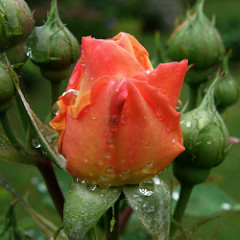

In [39]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

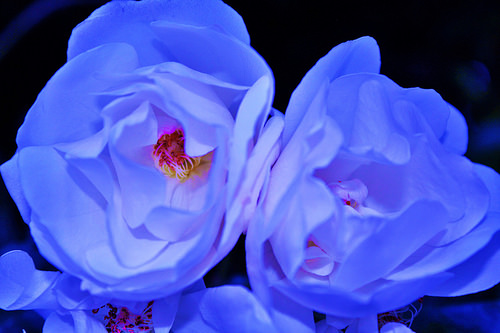

In [41]:
PIL.Image.open(str(roses[1]))

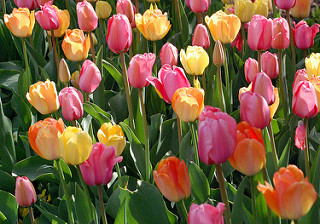

In [43]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

**Load using keras.preprocessing**

Load these images off disk using the helpful image_dataset_from_directory utility. This will take you from a directory of images on disk to a tf.data.Dataset in just a couple lines of code. If you like, you can also write your own data loading code from scratch

In [44]:
#Loader paramater
batch_size = 32
img_height = 180
img_width = 180

In [45]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [46]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [47]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


**Here are the first 9 images from the training dataset.**

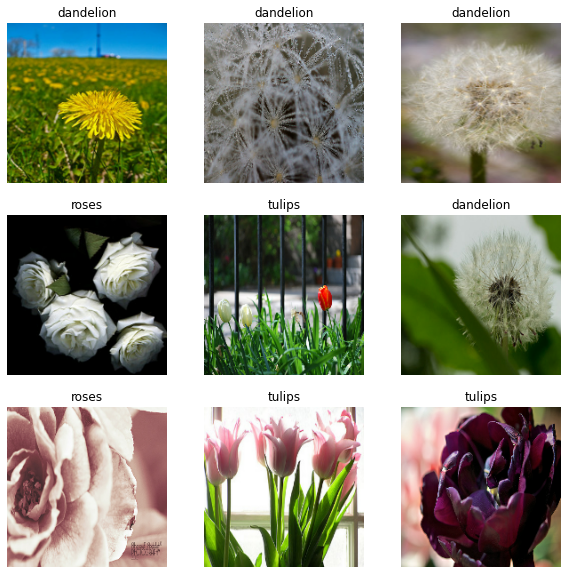

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [49]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

You can call .numpy() on the image_batch and labels_batch tensors to convert them to a numpy.ndarray.